In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (30,10)
import numpy as np 
import pandas as pd 
import xgboost as xg 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error as MSE 

In [41]:
df_train=pd.read_csv("sales_train.csv")
df_test=pd.read_csv("test.csv")
shop=pd.read_csv("shops.csv")
items=pd.read_csv("items.csv")
item_categories=pd.read_csv("item_categories.csv")

In [44]:
df_train["date"]=pd.to_datetime(df_train["date"],format='%d.%m.%Y')

In [47]:
df_train['day']=df_train['date'].dt.day
df_train['month']=df_train['date'].dt.month
df_train['year']=df_train['date'].dt.year
df_train=df_train.sort_values(by='date')
df_test['month']=11
df_test['year']=2015
#df_train.drop(['date'],axis=1,inplace=True)

In [48]:
df_train[(df_train['month']==11) & (df_train['year']==2015)]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,day,month,year


In [26]:
merged=pd.merge(df_train,items[['item_id','item_category_id']],on='item_id')
df_test=pd.merge(df_test,items[['item_id','item_category_id']],on='item_id')

In [27]:
merged.drop(['date','day'],axis=1,inplace=True)

In [28]:
final_df=merged.groupby(['year','month','shop_id','item_id','item_category_id']).agg({'item_price': 'mean', 
                                                                   'item_cnt_day': 'sum'
                                                                  }).reset_index()

In [29]:
final_df.drop(['item_price'],axis=1,inplace=True)

In [30]:
final_df=final_df[['shop_id', 'item_id', 'month', 'year','item_cnt_day','item_category_id']]

In [31]:
final_dfl_df.shape

(1799395, 6)

## Hot - Label Encoding

In [9]:
final_df=pd.get_dummies(final_df,columns=['shop_id','month'])
df_test=pd.get_dummies(df_test,columns=['shop_id','month'])

## Splitting Sequentially

In [10]:
X_train=final_df.iloc[:1259576,:].drop(['item_cnt_day'],axis=1)
Y_train=final_df.iloc[:1259576,:]['item_cnt_day']
X_test= final_df.iloc[1259576:,:].drop(['item_cnt_day'],axis=1)
Y_test= final_df.iloc[1259576:,:]['item_cnt_day']

## Model Training

In [11]:
train_dmatrix = xg.DMatrix(data = X_train, label = Y_train) 
test_dmatrix = xg.DMatrix(data = X_test, label = Y_test) 

In [12]:
param = {"booster":"gblinear", "objective":"reg:linear"} 
  
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 100) 
pred = np.round(xgb_r.predict(test_dmatrix) )

[12:32:05] WARNING: /workspace/src/objective/regression_obj.cu:167: reg:linear is now deprecated in favor of reg:squarederror.


In [13]:
rmse = np.sqrt(MSE(Y_test, pred)) 
print("RMSE : % f" %(rmse)) 

RMSE :  9.097441


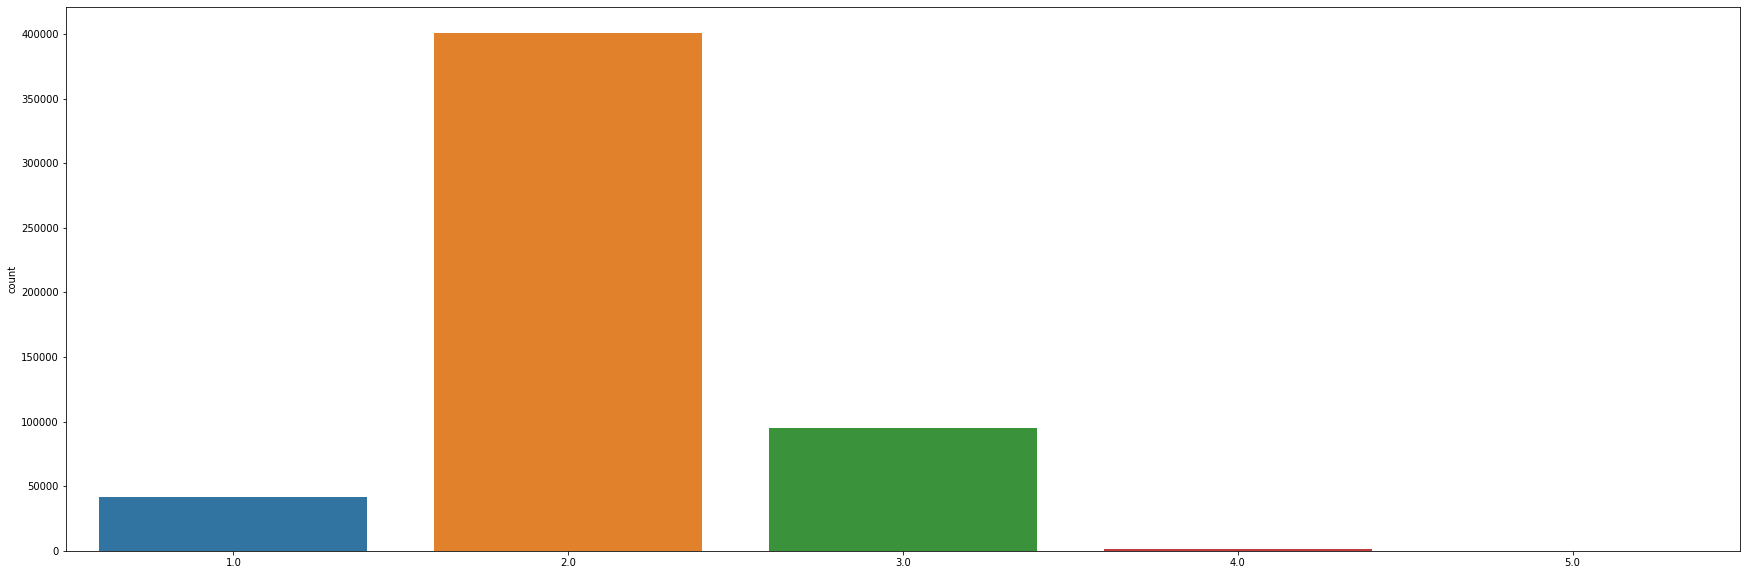

In [14]:
sns.countplot(pred)

## Making Submission

In [20]:
final_df.shape

(1799395, 76)

In [21]:
X_train=final_df.drop(['item_cnt_day'],axis=1)
Y_train=final_df['item_cnt_day']
train_dmatrix = xg.DMatrix(data = X_train, label = Y_train) 
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 20) 

MemoryError: Unable to allocate 1.01 GiB for an array with shape (1799395, 75) and data type float64

In [ ]:
test_dmatrix=xg.DMatrix(data = df_test.drop(['ID'],axis=1)) 
pred = np.round(xgb_r.predict(test_dmatrix))

In [ ]:
submission=pd.DataFrame()
submission['ID']=df_test['ID']
submission['item_cnt_month']=pred

In [ ]:
submission['item_cnt_month'].nunique()

In [194]:
submission.to_csv('Round 1| XGB | No Item Cat.csv',index=False)
